# Health Insurance Lead Score - Case Study
Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

Demographics (city, age, region etc.)
Information regarding holding policies of the customer
Recommended Policy Information

### Below are the steps for Classification modeling:
- Reading and Understanding the dataset.
- Data Cleanup 
- Visualization and Data Analysis
- Outlier Treatment
- Data Preparation
- Model Building and Evaluation
- Making Prediction on Test Set
- Final Conclusion

# Reading and Understanding the dataset

In [1]:
# Import the Basic library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import sklearn for data split into Train and Test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#Import stats model 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score

from sklearn.decomposition import PCA
from xgboost import XGBClassifier

# Import Metrics library
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
# Set number of rows and columns to be displayed
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# Lets read the Leads dataset. The Dataset is in the same folder with Jypyter notebook 
Leads = pd.read_csv("train_health.csv", encoding="ISO-8859-1")
Leads.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [5]:
Leads.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [6]:
# lets get the info about the dataset
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
ID                         50882 non-null int64
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           39191 non-null object
Holding_Policy_Duration    30631 non-null object
Holding_Policy_Type        30631 non-null float64
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 5.4+ MB


In [7]:
# Region_code is int64 which is suppose to be object

In [8]:
Leads[['Holding_Policy_Duration','Holding_Policy_Type','Health Indicator']]

,Holding_Policy_Duration,Holding_Policy_Type,Health Indicator
0,14+,3.0,X1
1,NaN,NaN,X2
2,1.0,1.0,NaN
3,14+,3.0,X1
4,3.0,1.0,X2
...,...,...,...
50877,NaN,NaN,X3
50878,7.0,3.0,X3
50879,14+,1.0,X2
50880,2.0,2.0,X2


In [9]:
# Lets check descriptive stats
Leads.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [10]:
#lets check the shape of dataset
Leads.shape

(50882, 14)

In [11]:
#lets check the Lead number for uniquiness
Leads['ID'].nunique()

50882

ID can be referenced as Primary key for the dataset

# Data Cleanup

Drop ID since they all are unique values and does not seems to be useful for analysis

In [12]:
# Dropping Prospect ID since they have all unique values and does not seems to be useful for analysis.
Leads.drop(['ID'], axis=1, inplace = True)

### Handing Null Value

In [13]:
#Lets check the null value percentage for the columns 
round(Leads.isnull().sum()/len(Leads.index)*100,2).sort_values(ascending=False)

Holding_Policy_Type        39.80
Holding_Policy_Duration    39.80
Health Indicator           22.98
Response                    0.00
Reco_Policy_Premium         0.00
Reco_Policy_Cat             0.00
Is_Spouse                   0.00
Lower_Age                   0.00
Upper_Age                   0.00
Reco_Insurance_Type         0.00
Accomodation_Type           0.00
Region_Code                 0.00
City_Code                   0.00
dtype: float64

If Holding_policy_type is nan then holding policy duration is also nan

**Now will `impute` the meaninigful data in columns which has good amount of null value but might be of significance.**

**Treat Null Value for Holding_Policy_Type**

In [14]:
round(Leads['Holding_Policy_Type'].value_counts(dropna=False,normalize=True)*100, 2)

NaN    39.80
3.0    26.10
1.0    16.06
2.0     9.84
4.0     8.20
Name: Holding_Policy_Type, dtype: float64

In [15]:
Leads['Holding_Policy_Type'] = Leads['Holding_Policy_Type'].replace(np.nan, '0.0')

In [16]:
round(Leads['Holding_Policy_Duration'].value_counts(dropna=False,normalize=True)*100, 2)

NaN     39.80
1.0      8.84
14+      8.52
2.0      8.37
3.0      7.05
4.0      5.45
5.0      4.64
6.0      3.72
7.0      3.23
8.0      2.59
9.0      2.19
10.0     1.60
11.0     1.07
12.0     1.01
13.0     1.00
14.0     0.92
Name: Holding_Policy_Duration, dtype: float64

In [17]:
Leads['Holding_Policy_Duration'] = Leads['Holding_Policy_Duration'].replace(np.nan, 0.0)

In [18]:
Leads['Holding_Policy_Duration'] = Leads['Holding_Policy_Duration'].replace('14+', 15.0)

In [19]:
round(Leads['Holding_Policy_Duration'].value_counts(dropna=False,normalize=True)*100, 2)

0.0     39.80
1.0      8.84
15.0     8.52
2.0      8.37
3.0      7.05
4.0      5.45
5.0      4.64
6.0      3.72
7.0      3.23
8.0      2.59
9.0      2.19
10.0     1.60
11.0     1.07
12.0     1.01
13.0     1.00
14.0     0.92
Name: Holding_Policy_Duration, dtype: float64

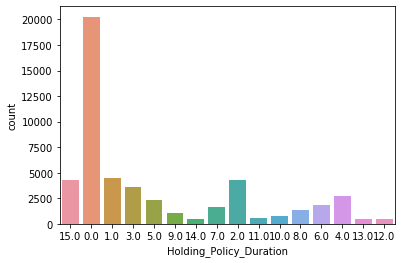

In [20]:
sns.countplot(Leads['Holding_Policy_Duration'])

In [21]:
# We can create meaningful NAN by putting zero to policy duration.

In [22]:
round(Leads['Health Indicator'].value_counts(dropna=False,normalize=True)*100, 2)

X1     25.57
NaN    22.98
X2     20.31
X3     13.29
X4     11.29
X5      3.39
X6      2.52
X7      0.39
X8      0.15
X9      0.12
Name: Health Indicator, dtype: float64

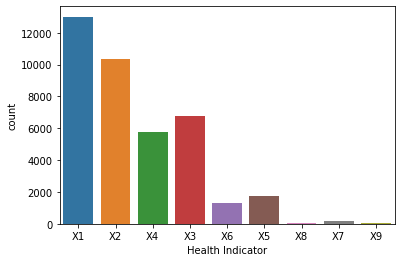

In [23]:
sns.countplot(Leads['Health Indicator'])

In [24]:
# Let us rename missing health indicator as X0

In [25]:
Leads['Health Indicator'] = Leads['Health Indicator'].replace(np.nan, 'X0')

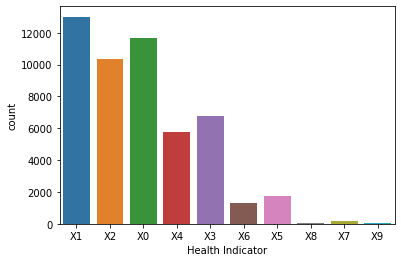

In [26]:
sns.countplot(Leads['Health Indicator'])

In [27]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           50882 non-null object
Holding_Policy_Duration    50882 non-null object
Holding_Policy_Type        50882 non-null object
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(1), int64(5), object(7)
memory usage: 5.0+ MB


In [28]:
#lets check the shape of dataset after null value treatment.
Leads.shape

(50882, 13)

In [29]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           50882 non-null object
Holding_Policy_Duration    50882 non-null object
Holding_Policy_Type        50882 non-null object
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(1), int64(5), object(7)
memory usage: 5.0+ MB


In [30]:
# Since Reco_Policy_Cat & Reco_Policy_Premium  done by the agent after the Lead ,Not required for analysis let ud drop it

### Univariate Analysis

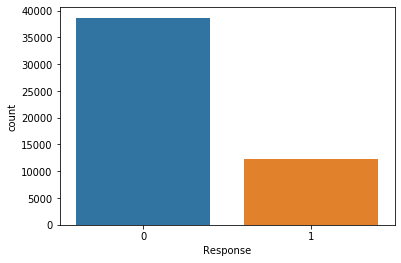

In [31]:
sns.countplot(Leads['Response'])
plt.show()

**Conversion rate seems to be around more than 25%. So the target variable is not skewed and good for further analysis.**

In [32]:
con_col = list(Leads.select_dtypes(include=[np.number]).columns)
con_col.remove('Response')
print(con_col)

['Region_Code', 'Upper_Age', 'Lower_Age', 'Reco_Policy_Cat', 'Reco_Policy_Premium']


#### Continious Variable

In [33]:
Leads[con_col].describe()

,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,15.115188,14183.950069
std,1424.081652,17.310271,17.319375,6.340663,6590.074873
min,1.000000,18.000000,16.000000,1.000000,2280.000000
25%,523.000000,28.000000,27.000000,12.000000,9248.000000
50%,1391.000000,44.000000,40.000000,17.000000,13178.000000
75%,2667.000000,59.000000,57.000000,20.000000,18096.000000
max,6194.000000,75.000000,75.000000,22.000000,43350.400000


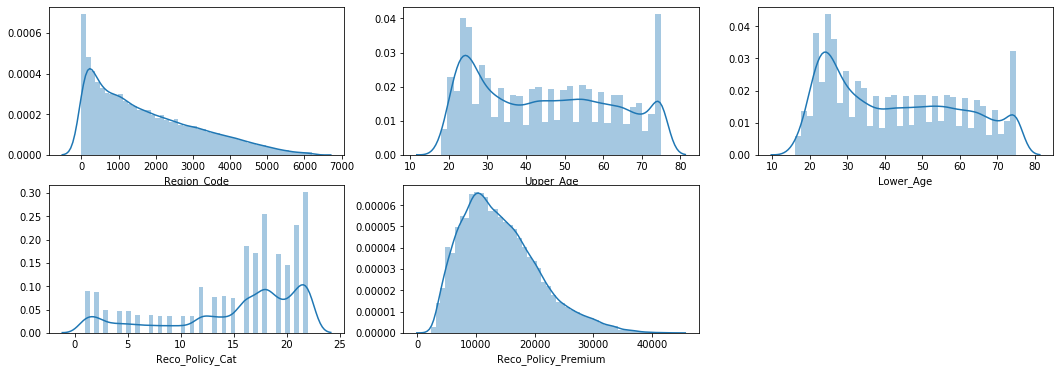

In [35]:
plt.figure(figsize=[18,6])
for i in range(len(con_col)):
    plt.subplot(2,3,i+1)
    sns.distplot(Leads[con_col[i]])
plt.show()

#### Categorical Variable

In [36]:
cat_col = list(Leads.select_dtypes(exclude=[np.number]).columns)
print(cat_col)

['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type']


In [37]:
Leads[cat_col].describe()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type
count,50882,50882,50882,50882,50882,50882.0,50882
unique,36,2,2,2,10,16.0,5
top,C1,Owned,Individual,No,X1,0.0,0.0
freq,8973,27951,40536,42460,13010,20251.0,20251


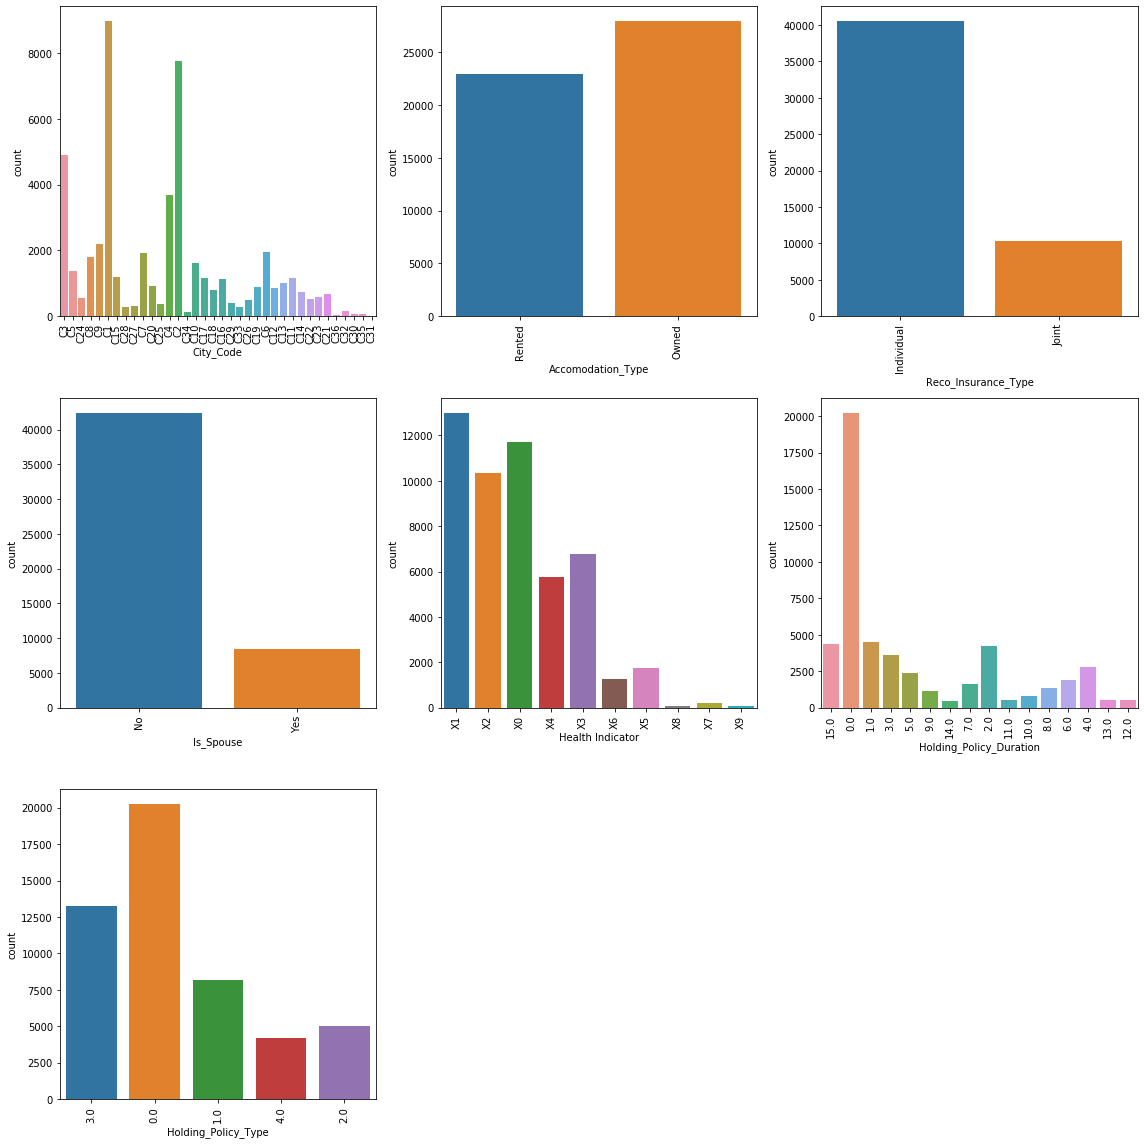

In [38]:
plt.figure(figsize=[16,16])
for i in range(len(cat_col)):
    plt.subplot(3,3,i+1)
    sns.countplot(Leads[cat_col[i]])
    plt.xticks(Rotation=90)
plt.tight_layout()
plt.show()

In [39]:
## C1 & C2 are the best for 
## Most the joint insurance is without spouse

# Health indicator x1 is high
# Individual is more than  joint 
# Accomodation owned has more inclination for insurance

In [40]:
#Lets check the shape again
Leads.shape

(50882, 13)

### Bi-variate Analysis

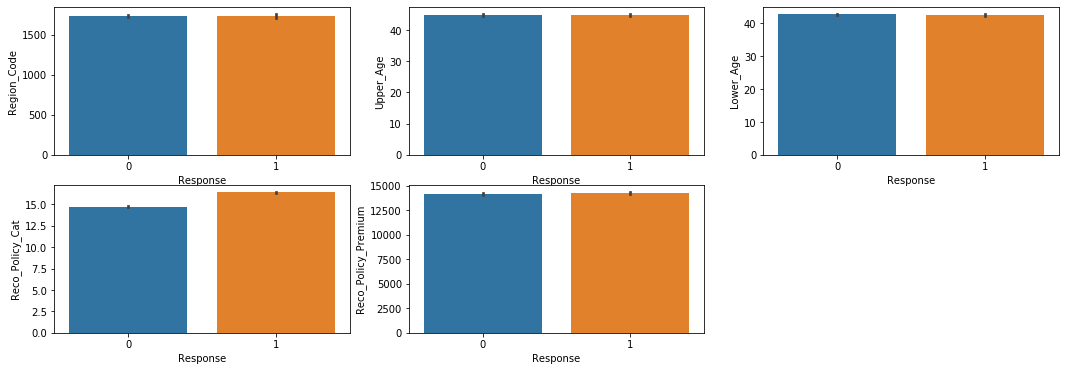

In [41]:
#Lets check conversion rate on continious variable
#con_col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=[18,6])
for i in range(len(con_col)):
    plt.subplot(2,3,i+1)
    sns.barplot(data=Leads, x='Response', y=con_col[i])
plt.show()

**Customer are getting converted when they are visiting the website and spending time on it.**

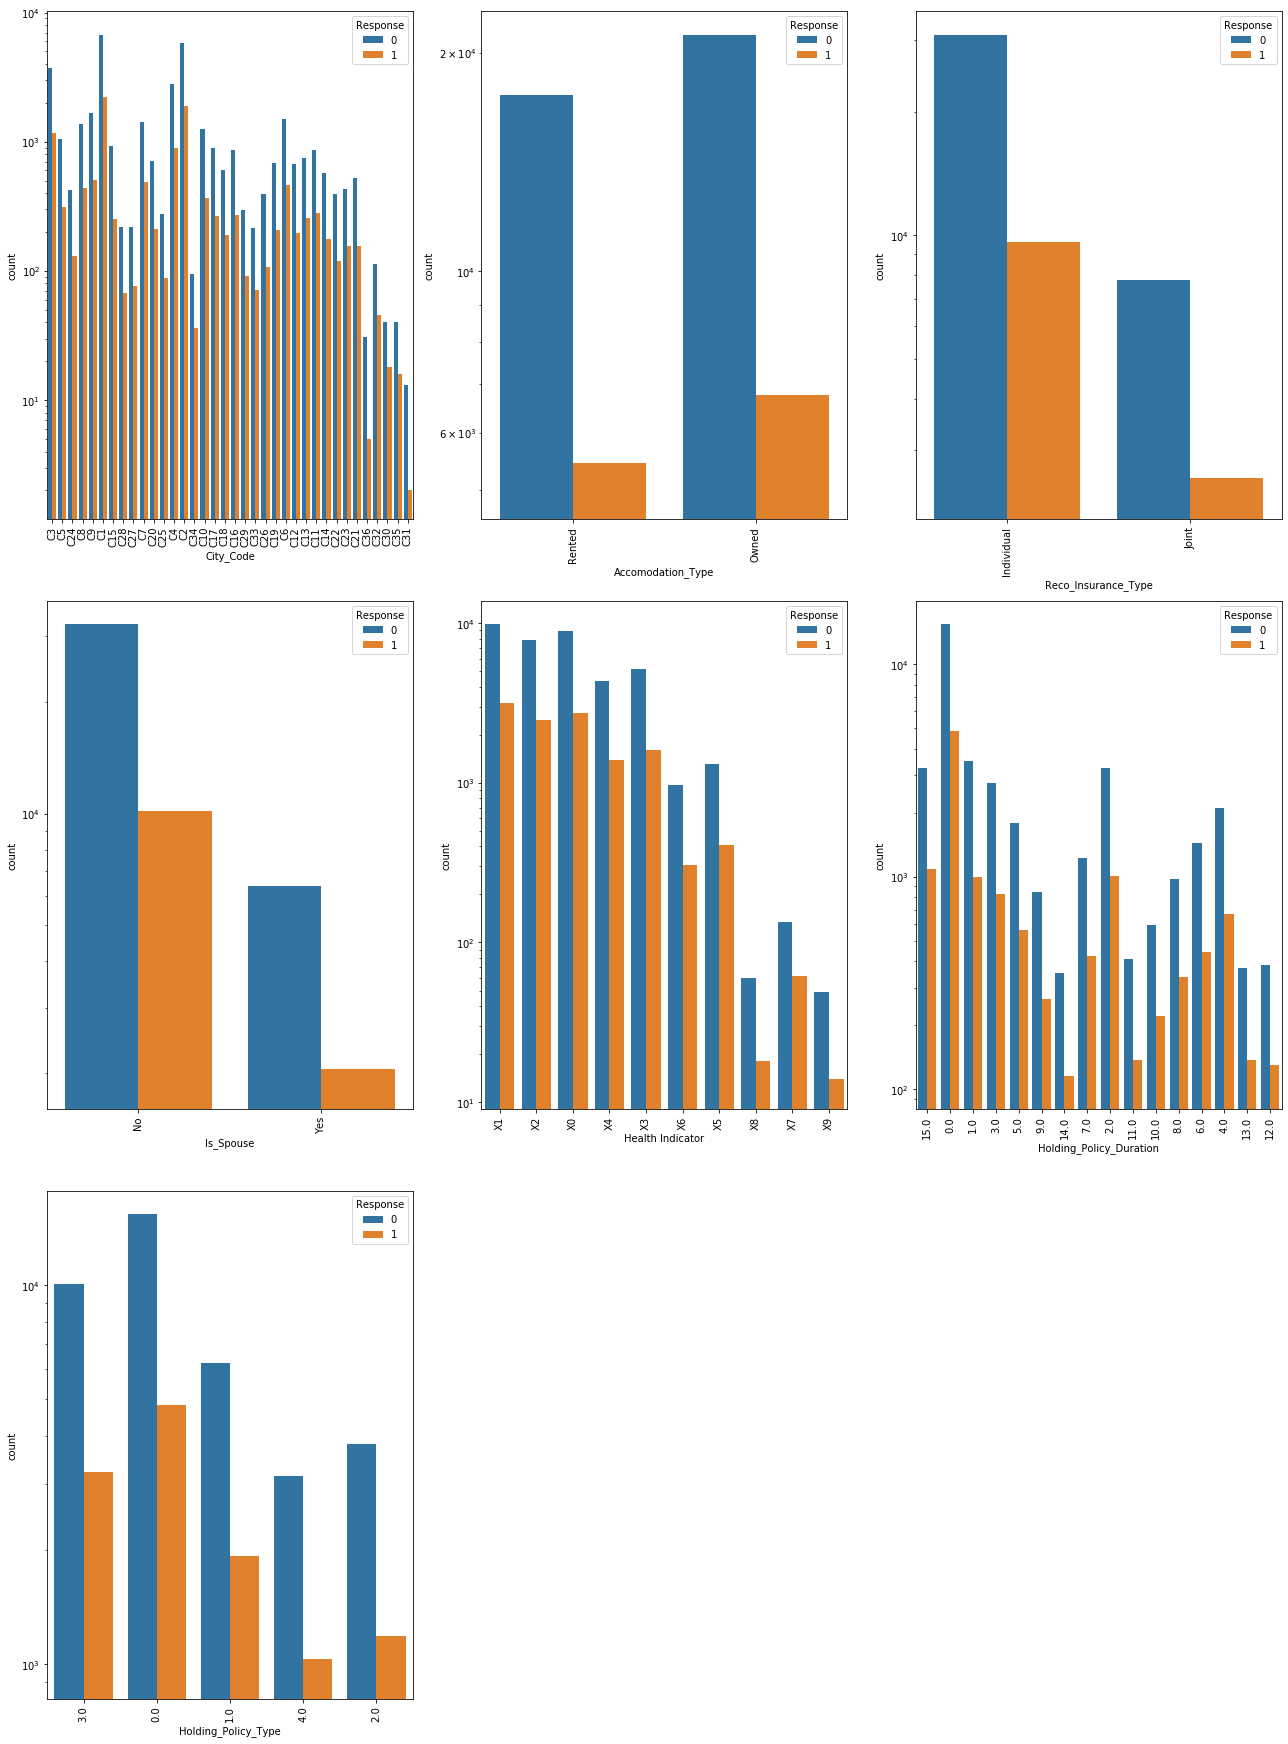

In [42]:
#Lets check conversion rate on continious variable
cat_col = list(Leads.select_dtypes(exclude=[np.number]).columns)
plt.figure(figsize=[18,32])
for i in range(len(cat_col)):
    plt.subplot(4,3,i+1)
    sns.countplot(Leads[cat_col[i]], hue=Leads['Response'], log='y')
    plt.xticks(Rotation=90)
plt.tight_layout()
plt.show()

### Multi-Variate Analysis

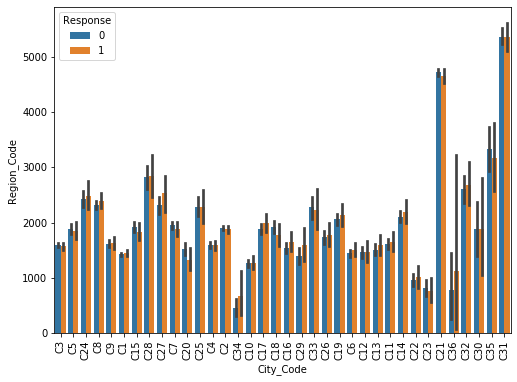

In [43]:
# lets check the conversion rate for Specialization with respect to Total Visits and Total Time Spent on Website
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
sns.barplot(data=Leads, x='City_Code', y='Region_Code', hue='Response')
plt.xticks(Rotation=90)
#plt.subplot(1,2,2)
#sns.barplot(data=Leads, x='Specialization', y='Total Time Spent on Website', hue='Converted')
#plt.xticks(Rotation=90)
plt.show()

# Data Preparation

Taking dataset copy for data preparation.

In [44]:
Leads['Region_Code']=Leads['Region_Code'].astype(str)
Leads['Holding_Policy_Type']=Leads['Holding_Policy_Type'].astype(str)
Leads['Reco_Policy_Cat']=Leads['Reco_Policy_Cat'].astype(str)
Leads['Holding_Policy_Duration'] =Leads['Holding_Policy_Duration'].astype(str)

In [45]:
#lets get the categorical column for dummies
cat_col = list(Leads.select_dtypes(exclude=[np.number]).columns)
cat_col

['City_Code',
 'Region_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat']

In [46]:

categorical_features = cat_col
categorical_transformer = LabelEncoder()

### Feature Scaling

In [47]:
# Creating X for data Modeling
X = Leads.drop(['Response'], axis=1)
X.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,C3,3213,Rented,Individual,36,36,No,X1,15,3.0,22,11628.0
1,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0
2,C5,3732,Owned,Individual,32,32,No,X0,1.0,1.0,19,7450.0
3,C24,4378,Owned,Joint,52,48,No,X1,15,3.0,19,17780.0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0


In [48]:
# Creating y for data Modeling
y = Leads['Response']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

In [49]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
City_Code                  50882 non-null object
Region_Code                50882 non-null object
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           50882 non-null object
Holding_Policy_Duration    50882 non-null object
Holding_Policy_Type        50882 non-null object
Reco_Policy_Cat            50882 non-null object
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(1), int64(3), object(9)
memory usage: 5.0+ MB


In [51]:
X['Holding_Policy_Duration'] =X['Holding_Policy_Duration'].astype(str)

In [52]:

cat_columns = []
for col in X.select_dtypes('object').columns:
    print(col)
    cat_columns.append(col)
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

City_Code
Region_Code
Accomodation_Type
Reco_Insurance_Type
Is_Spouse
Health Indicator
Holding_Policy_Duration
Holding_Policy_Type
Reco_Policy_Cat


In [53]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)

(35617, 12)
(15265, 12)


In [54]:

X_train , X_valid, y_train, y_valid = train_test_split(X,y, 
                                                       test_size=0.2, 
                                                       random_state=42, 
                                                       stratify=y)

In [55]:
cat_features_index = [i for i,col in enumerate(X.columns) if col in cat_columns]
cat_features_index

[0, 1, 2, 3, 6, 7, 8, 9, 10]

In [56]:
SEED=100
NUM_OF_BOOST_ROUND = 10000
EARLY_STOPPING = 300

params = {
    'cat_features': cat_features_index,
    'eval_metric': 'AUC',
    'random_seed': SEED,
    'n_estimators': NUM_OF_BOOST_ROUND,
}

In [57]:
import lightgbm as lgb
from catboost import CatBoostClassifier, Pool
clf = lgb.LGBMClassifier(**params)

In [58]:
clf.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, verbose=-1)

[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: eval_metric
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[260]	valid_0's binary_logloss: 0.512733


LGBMClassifier(boosting_type='gbdt', cat_features=[0, 1, 2, 3, 6, 7, 8, 9, 10],
               class_weight=None, colsample_bytree=1.0, eval_metric='AUC',
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10000, n_jobs=-1, num_leaves=31, objective=None,
               random_seed=100, random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [59]:
ypred_lgb = clf.predict_proba(X_valid)[:,1]

In [60]:
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
roc_auc_score(y_valid, ypred_lgb)

0.6712922742334508

In [62]:
bst = CatBoostClassifier(**params, early_stopping_rounds=EARLY_STOPPING)
_ = bst.fit(X_train, y_train, eval_set=(X_valid,y_valid), plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [63]:
ypred_cat = bst.predict_proba(X_valid)[:,1]

In [64]:
roc_auc_score(y_valid, ypred_cat)

0.8094375682610975

In [65]:
f_importance_df = pd.DataFrame(bst.get_feature_importance(), columns=['importance'], index=X_valid.columns)
f_importance_df = f_importance_df.sort_values(by='importance', ascending=False)

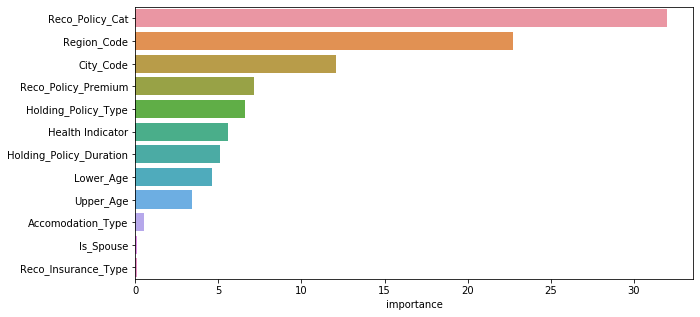

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(x=f_importance_df.importance[:500], y=f_importance_df.index[:500]);

In [69]:
ypred_test = bst.predict_proba(XTEST)[:,1]

NameError: name 'XTEST' is not defined

In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [67]:
# Now let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

NameError: name 'cutoff_df' is not defined

**From the above plots, 0.35 seems to optimum cutoff value for probability**

In [115]:
#Lets Predict based on 0.34 cutoff value.
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
3009,630949,0,0.210541,1,1,1,0,0,0,0,0,0,0,0
1012,649355,0,0.026637,1,0,0,0,0,0,0,0,0,0,0
9226,579735,0,0.354876,1,1,1,1,0,0,0,0,0,0,1
4750,614238,1,0.883533,1,1,1,1,1,1,1,1,1,0,1
7987,588625,1,0.815139,1,1,1,1,1,1,1,1,1,0,1


In [116]:
#Lets also assign the Lead score based on prediction probability.
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
3009,630949,0,0.210541,1,1,1,0,0,0,0,0,0,0,0,21
1012,649355,0,0.026637,1,0,0,0,0,0,0,0,0,0,0,3
9226,579735,0,0.354876,1,1,1,1,0,0,0,0,0,0,1,35
4750,614238,1,0.883533,1,1,1,1,1,1,1,1,1,0,1,88
7987,588625,1,0.815139,1,1,1,1,1,1,1,1,1,0,1,82


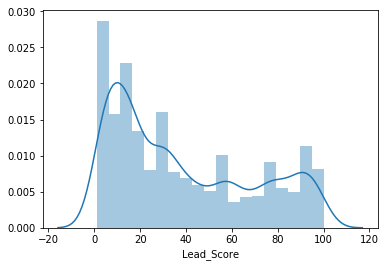

In [117]:
sns.distplot(y_train_pred_final['Lead_Score'])
plt.show()

Model is able to predict decent number of customers who are having lead score of more than 80, can be targeted first followed by lead score more than 60. 

In [118]:
# Let's check the overall accuracy of model.
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])

0.7942056369075736

In [119]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])
confusion

array([[3093,  812],
       [ 495, 1951]], dtype=int64)

In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Let's see the sensitivity 
TP / float(TP+FN)

0.7976287816843827

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.7920614596670935

In [123]:
# Calculate false postive rate - predicting when customer does not have converted
print(FP/ float(TN+FP))

0.20793854033290654


In [124]:
# positive predictive value 
print (TP / float(TP+FP))

0.7061165399927615


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8620401337792643


**Precision and Recall**

In [126]:
precision_score(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])

0.7061165399927615

In [127]:
recall_score(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])

0.7976287816843827

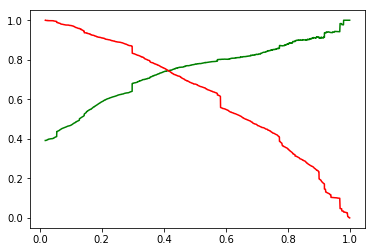

In [128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Model 8 has below metrics from Train Set:**
- Accuracy : 79.42 %
- Sensitivity: 79.76 %
- Specificity: 79.20 %

For the given business, this metrics are crucial for monitoring and will be helpful to target the right customers. It will not be an issue even if few low probable customers gets identified with our final model.

# Making Prediction on Test Set

In [129]:
X_test[scale_var] = scaler.transform(X_test[scale_var])
X_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What matters most to you in choosing a course,A free copy of Mastering The Interview,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable
3271,628652,0.284772,-0.606338,0.955505,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,644500,0.643547,1.970301,1.510766,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7936,588935,-0.432779,-0.764053,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,619437,-1.150329,-0.904666,-1.265540,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3830,623381,1.719873,-0.593037,2.066027,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [130]:
y_test_pred = model_8.predict(sm.add_constant(X_test[Final_columns]))
y_test_pred[:10]

3271    0.177509
1490    0.755434
7936    0.152453
4216    0.780677
3830    0.137872
1800    0.116477
6507    0.327511
4821    0.332670
4223    0.967425
4714    0.354876
dtype: float64

In [131]:
y_test_pred_final = pd.DataFrame({'Lead Number':X_test['Lead Number'], 'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final.head()

,Lead Number,Converted,Converted_Prob
3271,628652,0,0.177509
1490,644500,1,0.755434
7936,588935,0,0.152453
4216,619437,1,0.780677
3830,623381,0,0.137872


In [132]:
#Lets Predict based on 0.35 cutoff value.
y_test_pred_final['Final_Predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,Lead Number,Converted,Converted_Prob,Final_Predicted
3271,628652,0,0.177509,0
1490,644500,1,0.755434,1
7936,588935,0,0.152453,0
4216,619437,1,0.780677,1
3830,623381,0,0.137872,0


In [133]:
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_test_pred_final.head()

,Lead Number,Converted,Converted_Prob,Final_Predicted,Lead_Score
3271,628652,0,0.177509,0,18
1490,644500,1,0.755434,1,76
7936,588935,0,0.152453,0,15
4216,619437,1,0.780677,1,78
3830,623381,0,0.137872,0,14


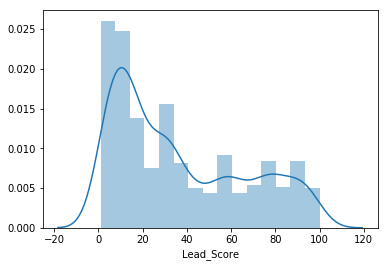

In [134]:
sns.distplot(y_test_pred_final['Lead_Score'])
plt.show()

Customer with Lead Score with more than 80 can be targeted first.

In [135]:
# Let's check the overall accuracy of model.
metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])

0.7914065369078223

In [136]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])
confusion

array([[1387,  347],
       [ 221,  768]], dtype=int64)

In [137]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7765419615773509

In [139]:
# Let us calculate specificity
TN / float(TN+FP)

0.7998846597462514

In [140]:
precision_score(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])

0.6887892376681615

In [141]:
recall_score(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])

0.7765419615773509

**Model 8 has below metrics from Test Set:**
- Accuracy : 79.14 %
- Sensitivity: 77.65 %
- Specificity: 79.98 %

In [142]:
#lets gets the co-efficent of the variables from final model.
model_8.params.sort_values(ascending=False)

Lead Source_Welingak Website             5.479259
Lead Source_Reference                    4.078589
Last Activity_Others                     2.224944
Last Notable Activity_Unreachable        1.610483
Last Activity_SMS Sent                   1.190430
Total Time Spent on Website              1.155089
Lead Source_Olark Chat                   1.020866
Lead Origin_Landing Page Submission     -0.315121
const                                   -0.832944
Last Notable Activity_Modified          -0.931057
Last Activity_Olark Chat Conversation   -1.065053
Last Activity_Email Bounced             -1.822447
dtype: float64

# Conclusion:

**Model 8 seems to be very stable Logistic Regression model.**<br>
Below are the top 3 key variables which contribute most towards the conversion rate<br>
- `Lead Source`
- `Last Activity/Last Notable Activity (just for students)`
- `Total Time Spent on Website`

Below are the key dummy variables that contribute most towards the conversion rate:<br>
- `Lead Source_Welingak Website`
- `Lead Source_Reference`
- `Last Activity_Others` (Had a Phone Conversation, View in browser link Clicked, Approached upfront, Email Marked Spam,     Email Received, Resubscribed to emails, Visited Booth in Tradeshow
- `Last Notable Activity_Unreachable`
- `Last Activity_SMS Sent`
- `Total Time Spent on Website`
- `Lead Source_Olark Chat`
 
**Area under ROC curve - 87%**<br>

**Model with optimal cutoff point 0.36 has below metrics:**<br>
On Training Set:
- Accuracy : 79.42 %
- Sensitivity: 79.76 %
- Specificity: 79.20 %<br>

On Test Set:
- Accuracy : 79.14 %
- Sensitivity: 77.65 %
- Specificity: 79.98 %

For the given business, this metrics are crucial for monitoring and will be helpful to target the right customers. 
It will not be an issue even if few low probable customer gets identified with our final model.

**Apart from this, we have calculated the Lead Score, So Sales team can use this score to contact the customers who will have highest probability of conversion and should first target for Lead score more than 80 followed by lead score more than 60.**<br>
Note: Lead Score values are 1 being Lowest and 100 being highest.

# Recommendation:
`Leverage on Technology:`
1. Create super creative banner adds and post it in Chat apps like Olark,
2. can use Welingak website to post the X-Education motivational info in the timelines. Create professional videos and promote then in the website.
3. From the model it is clear the hot leads prefer live chats. Must enhance the website with live chats. Build a digital friendly apps to attract more leads.

`Referral bonus strategy:`<br>
Since ‘Lead Source_Reference' is of the critical factor from the model. Referential bonus program must be launch at this period of time and that will attract more leads. Students testimonials, successful case studies will motivate the leads and the refereces. <br>

Also look for customer who are spending more on the X Education website and visiting more frequently.

